In [2]:
import sys

#Adding the directory to the path
sys.path.append('C://luis//videoMonitoring//scripts')

In [3]:
#Import libraries
from YOLO_object_detection import YOLO_detection
import logging
import cv2
from camera import capture_image, list_cameras
from aux_modules import save_bounding_boxes, plot_frame, disable_logging, plot_images, crop_img
from shufflenet import classificate_state, shufflenet_transform


[INFO]: Not loading pre-trained weights
[INFO]: Fine-tuning all layers...


c:\luis\videoMonitoring\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\luis\videoMonitoring\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
def list_cameras(max_cameras: int = 10) -> list:
    """
    Lists the indices of available cameras.

    Parameters:
        max_cameras (int, optional): The maximum number of camera indices to check.
                                     Defaults to 10.

    Returns:
        list: A list of available camera indices.
    """
    available_cameras = []
    for i in range(max_cameras):
        cap = cv2.VideoCapture(i)
        if cap is not None and cap.isOpened():
            available_cameras.append(i)
            cap.release()
    return available_cameras

In [6]:
available_cameras = list_cameras()
print(f"Available cameras: {available_cameras}")

Available cameras: [0, 1]



0: 480x640 1 stack_light, 79.8ms
Speed: 0.0ms preprocess, 79.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


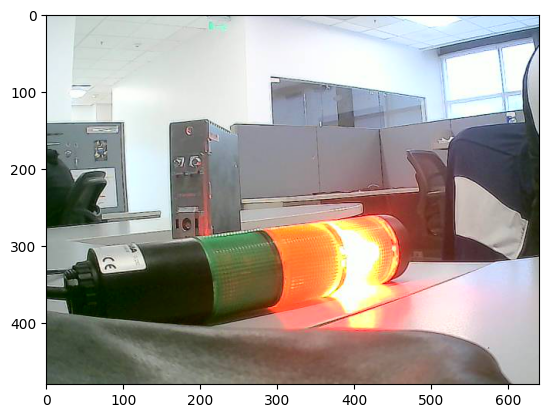

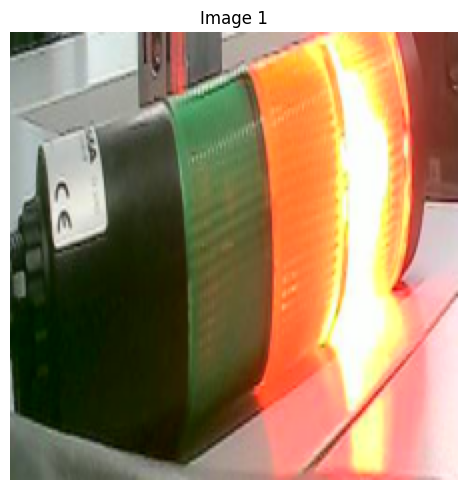

In [7]:
import matplotlib.pyplot as plt
frame = capture_image(0)
disable_logging(plt.imshow)(frame)
#convert to RGB 
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


disable_logging(plt.imshow)(frame_rgb)

bounding_boxes = YOLO_detection(frame_rgb)
save_bounding_boxes(bounding_boxes)

#disable_logging(plot_frame)(frame_rgb)
cropped_images = crop_img(frame_rgb, bounding_boxes, shufflenet_transform)
disable_logging(plot_images)(cropped_images)
labels = classificate_state(cropped_images)

logging.debug(f"Labels: {labels}")

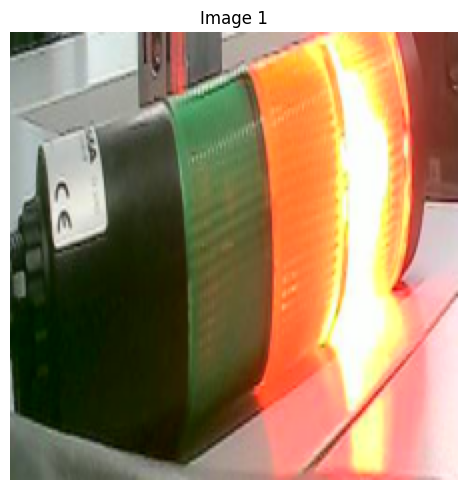

In [8]:
#disable_logging(plot_frame)(frame_rgb)
cropped_images = crop_img(frame_rgb, bounding_boxes, shufflenet_transform)
disable_logging(plot_images)(cropped_images)
labels = classificate_state(cropped_images)

logging.warning(f"Labels: {labels}")

In [15]:
import os
cap = cv2.VideoCapture(0)
# Set mediapipe model 
while cap.isOpened():
    ret, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cropped_images = crop_img(frame_rgb, bounding_boxes, shufflenet_transform)
    #disable_logging(plot_images)(cropped_images)
    labels = classificate_state(cropped_images)
    os.system('cls')
    print(f"Labels: {labels}")

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['Red']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: ['None']
Labels: [

KeyboardInterrupt: 